<a href="https://colab.research.google.com/github/ireneabby2003/ML-For-Beginners/blob/main/Copy_of_Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U imbalanced-learn  # Installs the imblearn library
!pip install xgboost            # Installs the xgboost library
!pip install pytorch-tabnet     # Installs the pytorch-tabnet library
!pip install optuna             # Installs the optuna library
!pip install seaborn            # Installs the seaborn library
!pip install tensorflow # Installs the tensorflow library

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from tensorflow import keras
from tensorflow.keras import layers
import optuna
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Step 1: Load dataset
df_raw = pd.read_csv("/content/drive/MyDrive/dataset_raw.csv", encoding='utf-8')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
df = df_raw.copy()

In [4]:
# Preview first 5 rows
display(df.head())

# Dataset shape
print(f"\nDataset Shape: {df.shape}")

# Basic info
print("\nDataset Info:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
display(df.describe(include='all').T)

# Check missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425



Dataset Shape: (10000, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfactio

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0



Missing Values Per Column:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


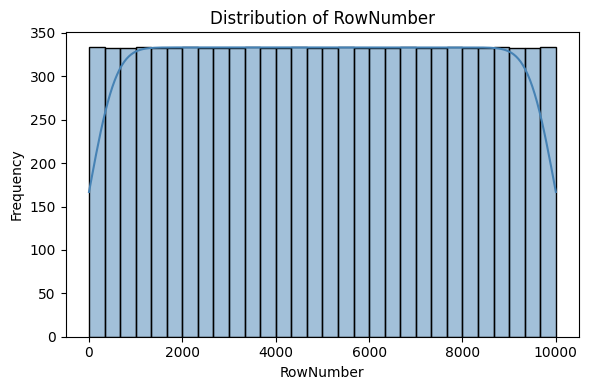

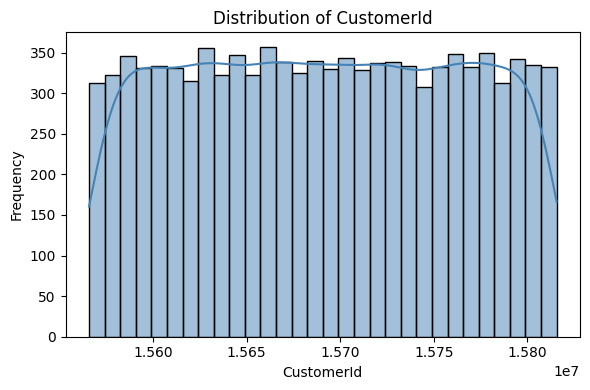

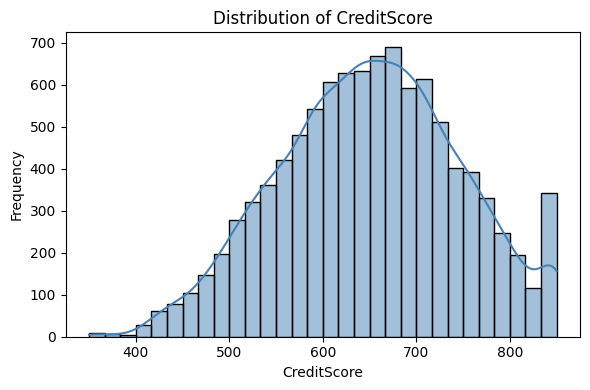

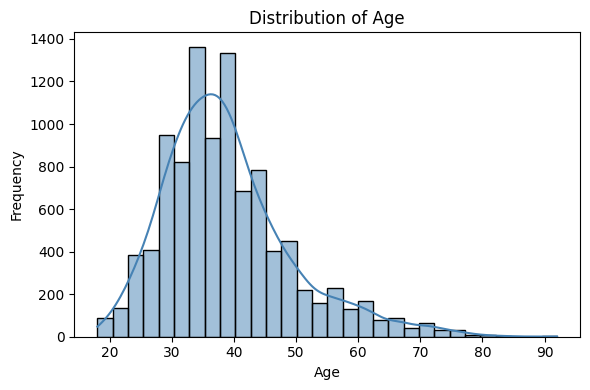

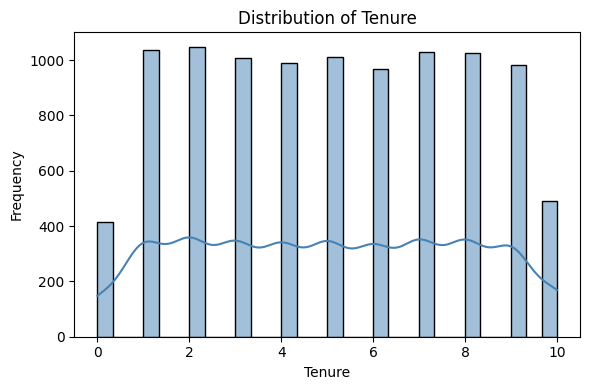

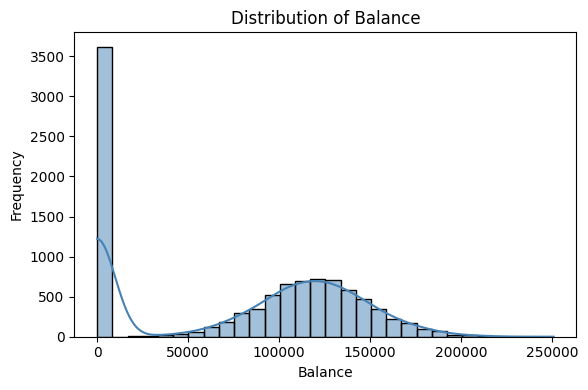

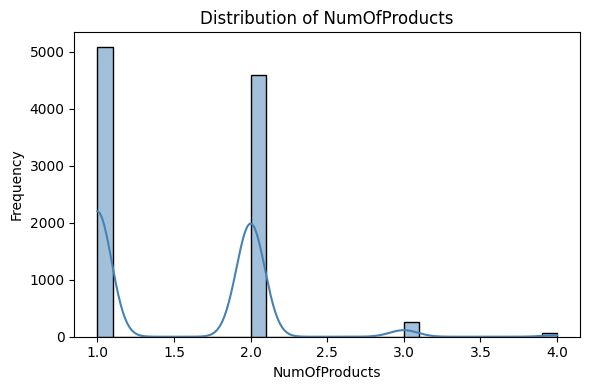

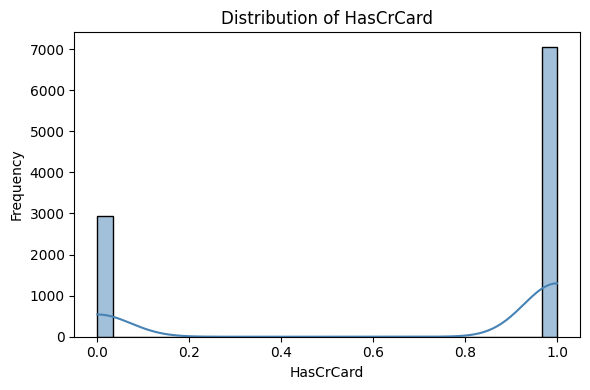

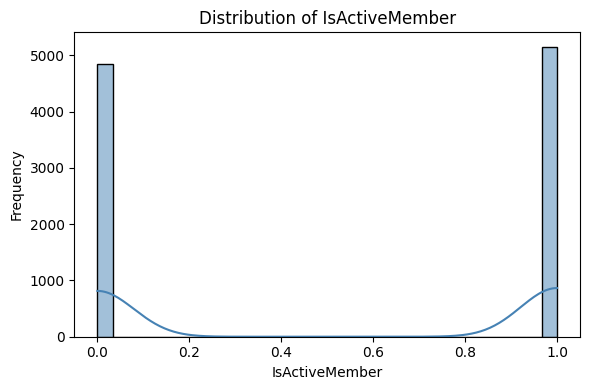

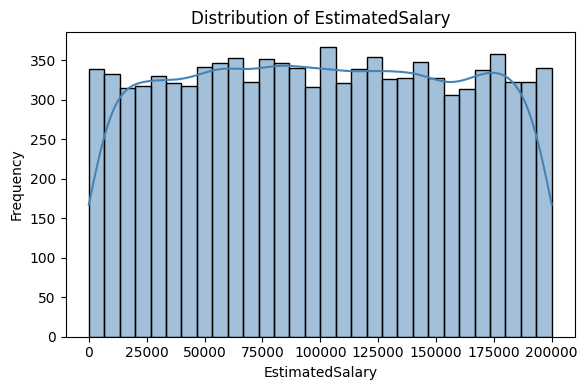

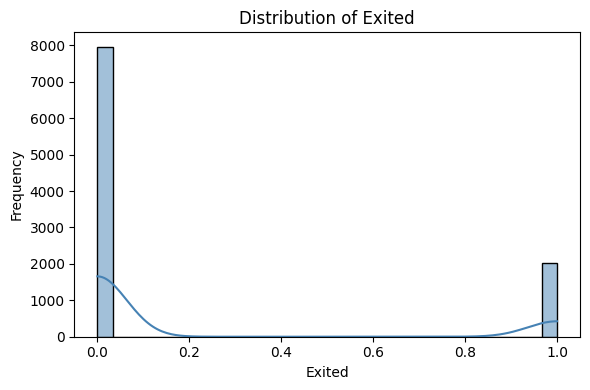

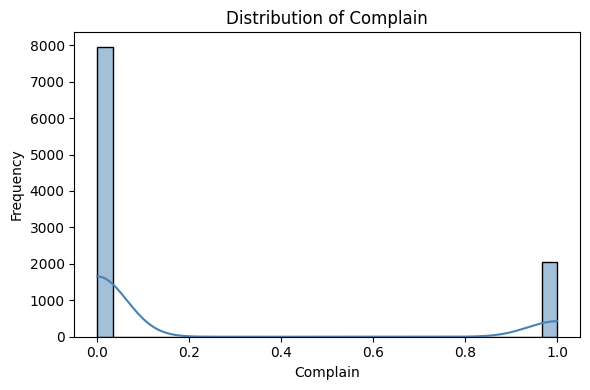

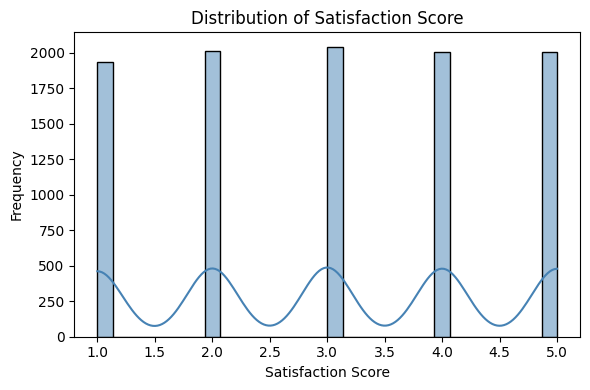

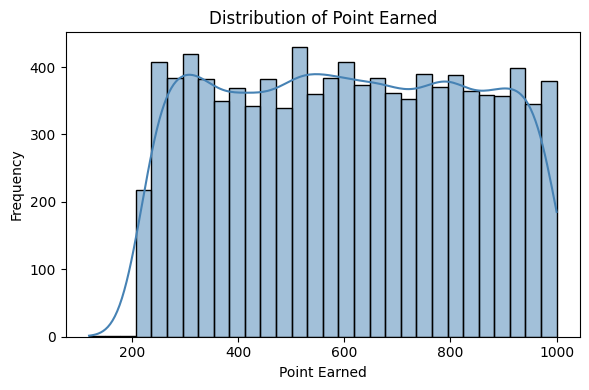

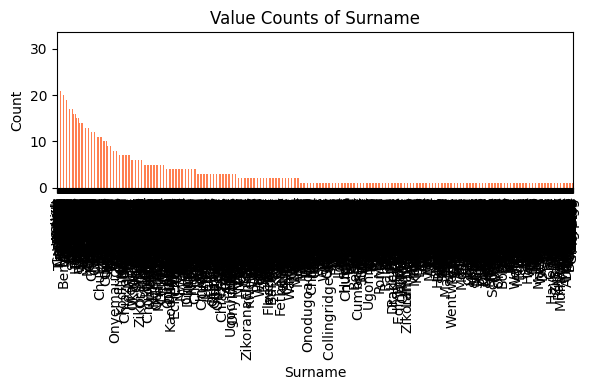

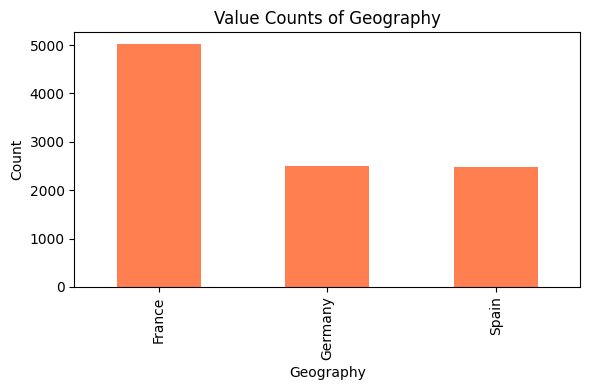

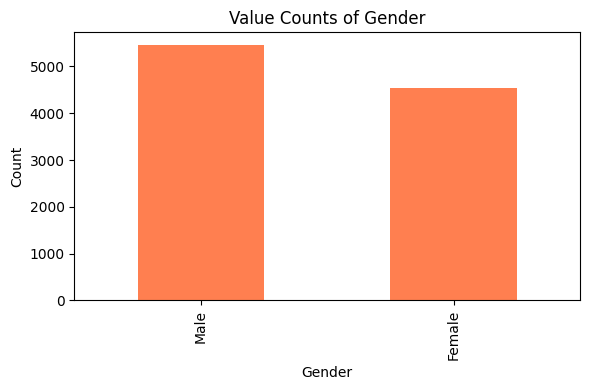

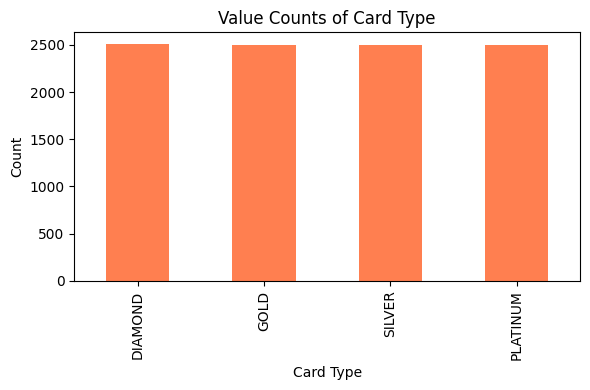

In [5]:
# Univariate distribution plots
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Plot numerical columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot categorical columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='coral')
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


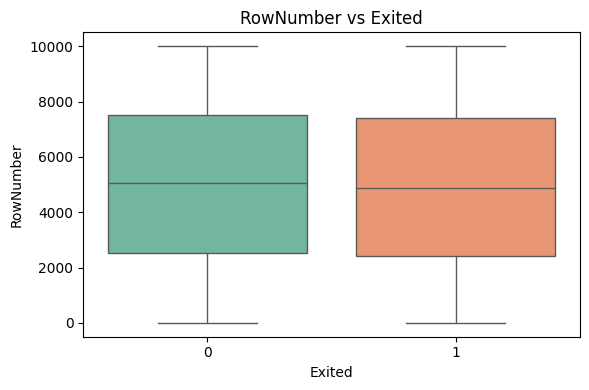

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


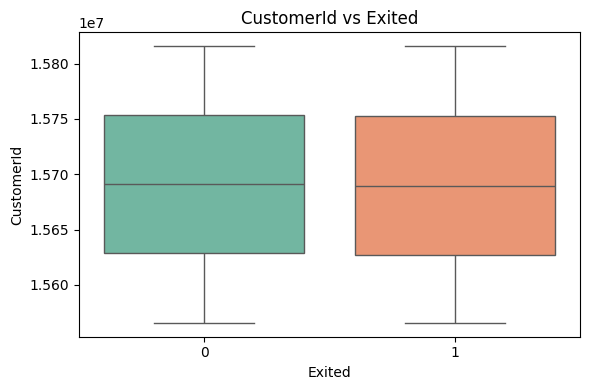

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


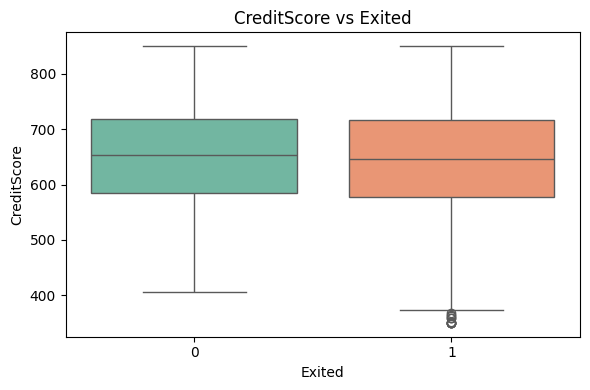

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


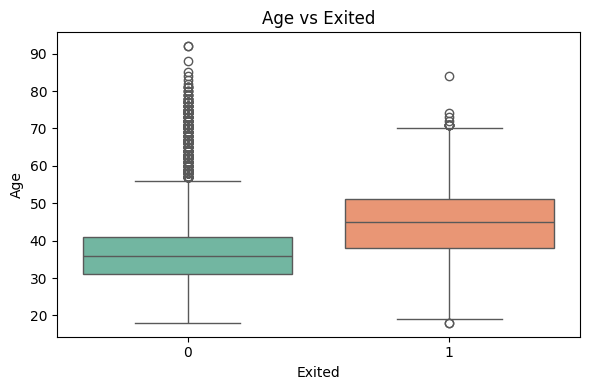

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


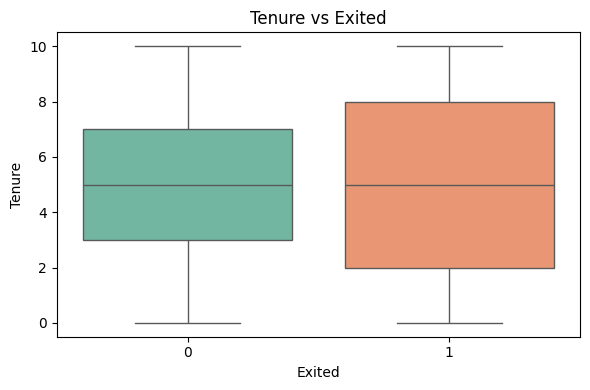

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


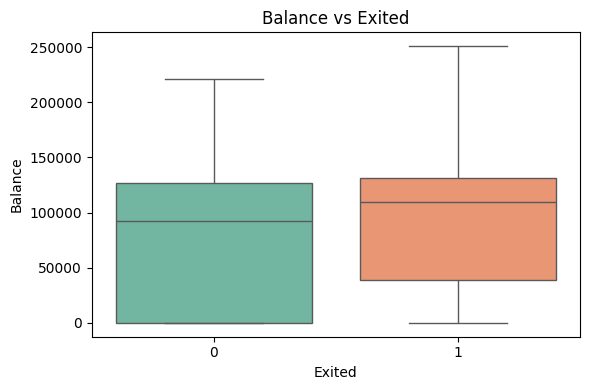

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


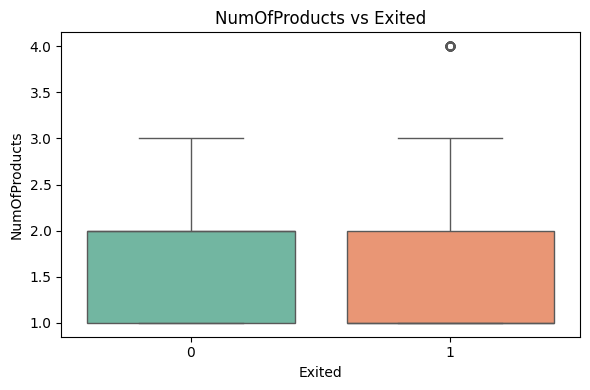

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


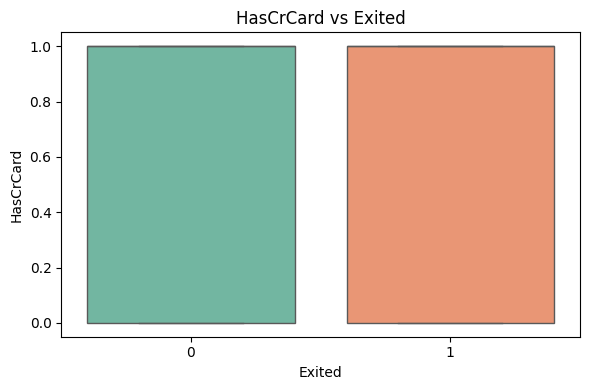

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


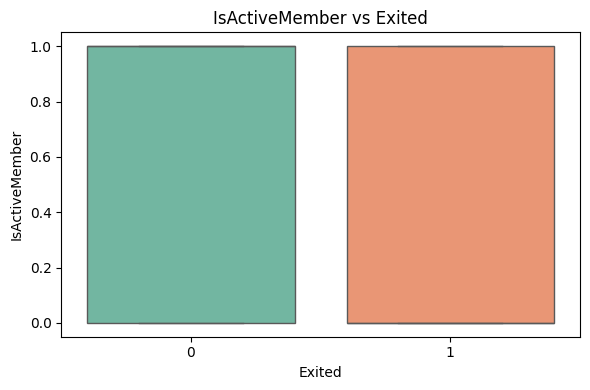

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


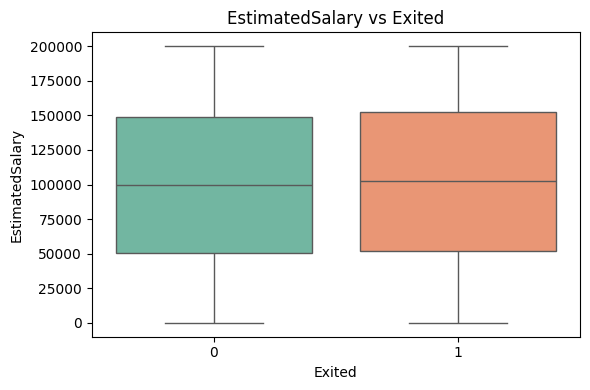

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


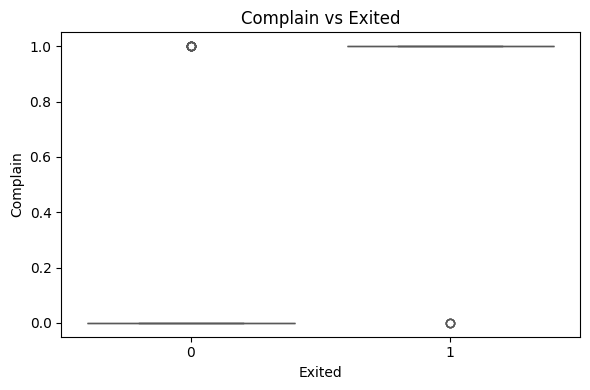

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


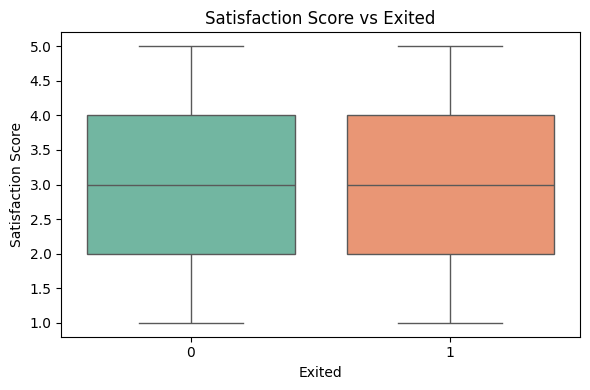

<ipython-input-6-1377503998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


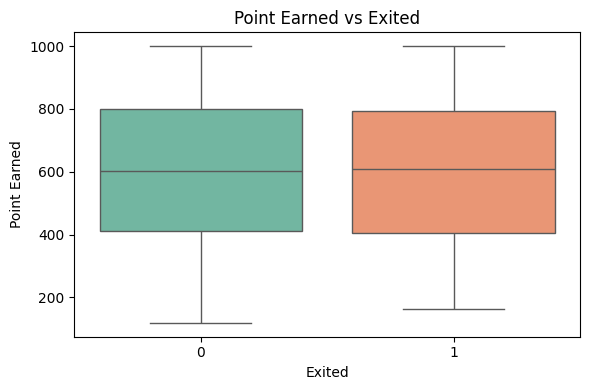

<Figure size 600x400 with 0 Axes>

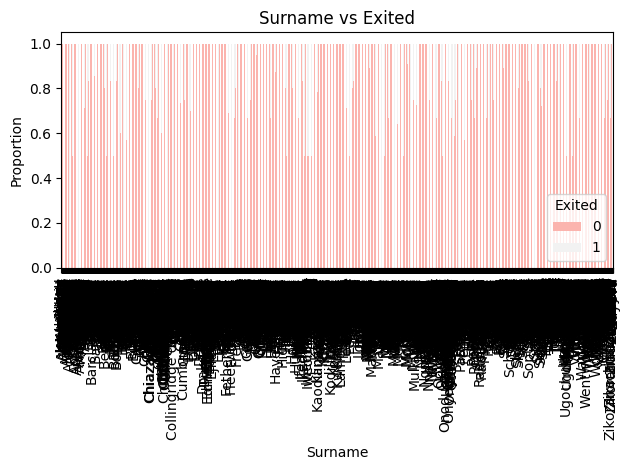

<Figure size 600x400 with 0 Axes>

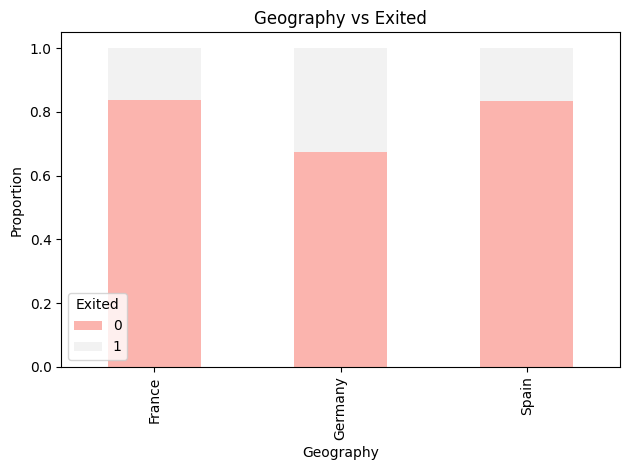

<Figure size 600x400 with 0 Axes>

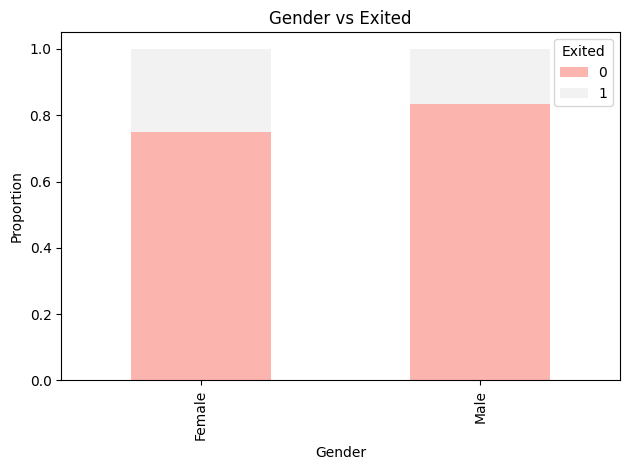

<Figure size 600x400 with 0 Axes>

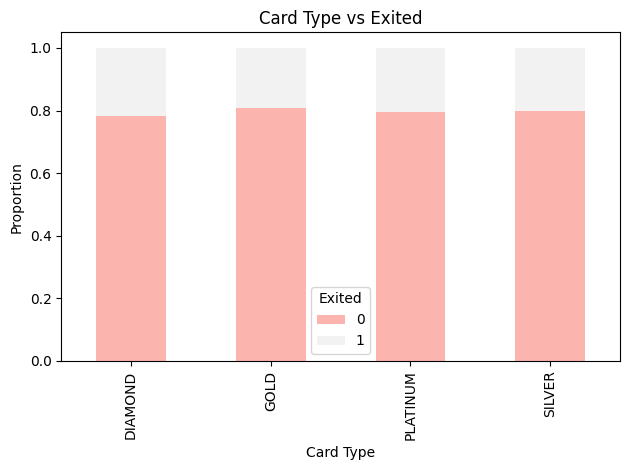

In [6]:
target_col = 'Exited'

# Numerical features vs target
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target_col, y=col, data=df, palette='Set2')
        plt.title(f'{col} vs {target_col}')
        plt.tight_layout()
        plt.show()

# Categorical features vs target
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    cross_tab = pd.crosstab(df[col], df[target_col], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, colormap='Pastel1')
    plt.title(f'{col} vs {target_col}')
    plt.ylabel('Proportion')
    plt.tight_layout()
    plt.show()

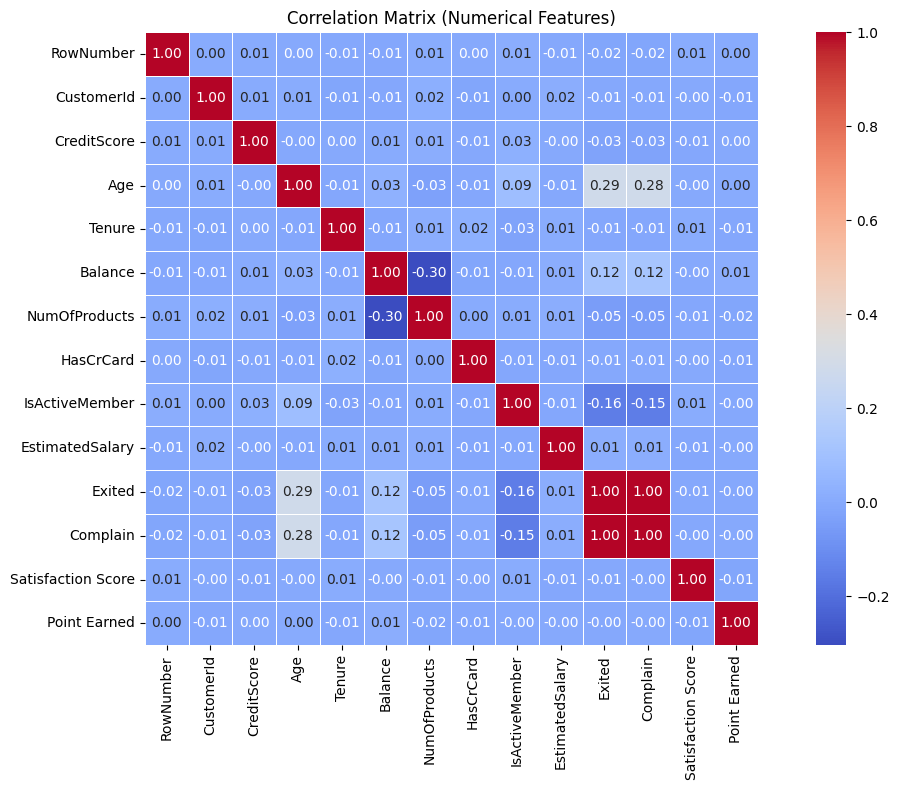

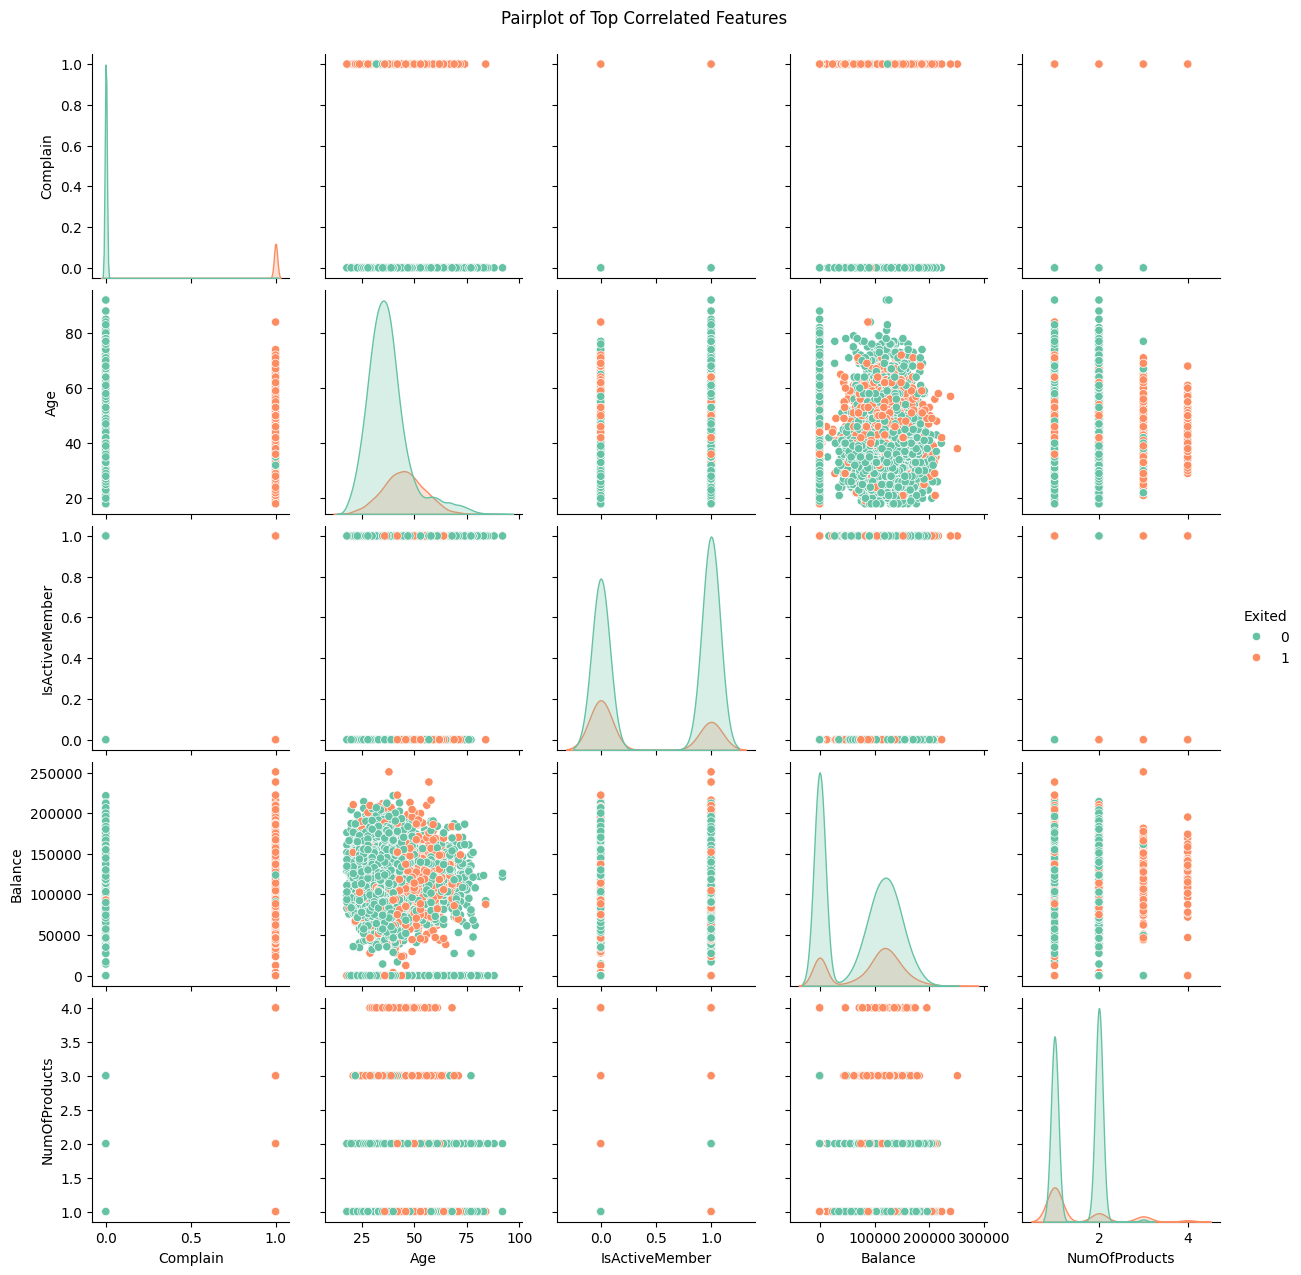

In [7]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()

# Pairplot for key features (top correlated with target)
cor_target = corr_matrix[target_col].abs().sort_values(ascending=False)
top_corr_features = cor_target[1:6].index.tolist()

sns.pairplot(df[top_corr_features + [target_col]], hue=target_col, palette='Set2')
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()



In [8]:
# Display missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values:\n", missing)

# Basic strategy: fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

Missing Values:
 Series([], dtype: int64)


In [9]:
from scipy.stats import zscore

# Z-score threshold
z_thresh = 3.0

# Winsorization boundaries (1st and 99th percentile)
for col in num_cols:
    if col != 'Exited':
        # Detect outliers
        z_scores = zscore(df[col])
        outliers = np.where(np.abs(z_scores) > z_thresh)
        print(f"{col}: {len(outliers[0])} outliers detected")

        # Winsorize
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = np.clip(df[col], lower, upper)

RowNumber: 0 outliers detected
CustomerId: 0 outliers detected
CreditScore: 8 outliers detected
Age: 133 outliers detected
Tenure: 0 outliers detected
Balance: 0 outliers detected
NumOfProducts: 60 outliers detected
HasCrCard: 0 outliers detected
IsActiveMember: 0 outliers detected
EstimatedSalary: 0 outliers detected
Complain: 0 outliers detected
Satisfaction Score: 0 outliers detected
Point Earned: 0 outliers detected


In [10]:
#outliers after clipping
for col in num_cols:
    if col != 'Exited':
        z_scores = zscore(df[col])
        outliers = np.where(np.abs(z_scores) > z_thresh)
        print(f"{col}: {len(outliers[0])} outliers remaining after clipping")

RowNumber: 0 outliers remaining after clipping
CustomerId: 0 outliers remaining after clipping
CreditScore: 0 outliers remaining after clipping
Age: 151 outliers remaining after clipping
Tenure: 0 outliers remaining after clipping
Balance: 0 outliers remaining after clipping
NumOfProducts: 0 outliers remaining after clipping
HasCrCard: 0 outliers remaining after clipping
IsActiveMember: 0 outliers remaining after clipping
EstimatedSalary: 0 outliers remaining after clipping
Complain: 0 outliers remaining after clipping
Satisfaction Score: 0 outliers remaining after clipping
Point Earned: 0 outliers remaining after clipping


In [11]:
# Identify categorical columns for encoding
cat_cols_to_encode = df.select_dtypes(include='object').columns.tolist()

# Handle potential identifier columns that shouldn't be encoded or used
# Assuming 'RowNumber', 'CustomerId' and 'Surname' are identifiers and not useful for the model
identifier_cols = ['RowNumber', 'CustomerId', 'Surname']
cat_cols_to_encode = [col for col in cat_cols_to_encode if col not in identifier_cols]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=identifier_cols, errors='ignore'), columns=cat_cols_to_encode, drop_first=True)

print("Categorical features encoded.")
print(f"Shape after encoding: {df_encoded.shape}")

# Feature Engineering ===
df_fe = df_encoded.copy() # Row 2

# Interaction Features
if {'Balance', 'EstimatedSalary'}.issubset(df_fe.columns): # Row 5
    df_fe['Balance_x_Salary'] = df_fe['Balance'] * df_fe['EstimatedSalary'] # Row 6

# Ratio Features
if {'Balance', 'CreditScore'}.issubset(df_fe.columns): # Row 9
    # Add a small epsilon to avoid division by zero if CreditScore can be 0
    df_fe['Balance_to_Credit'] = df_fe['Balance'] / (df_fe['CreditScore'] + 1e-5) # Row 11

# Binning Age
if 'Age' in df_fe.columns: # Row 14
    df_fe['Age_bin'] = pd.cut(df_fe['Age'], bins=[0, 30, 40, 50, 100], labels=[0, 1, 2, 3]) # Row 15
    # Convert to numeric, handling potential NaNs if bins don't cover all ages
    df_fe['Age_bin'] = df_fe['Age_bin'].astype(float) # Row 17


Categorical features encoded.
Shape after encoding: (10000, 18)


In [12]:
# Separate features and target
target_col = 'Exited'
features = df_fe.drop(columns=[target_col])
target = df_fe[target_col]

# Standardize numerical features
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame
X = pd.DataFrame(features_scaled, columns=features.columns)
y = target.copy()

print("Feature scaling complete.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Feature scaling complete.
Shape of X: (10000, 20)
Shape of y: (10000,)


In [13]:
# 1. Remove near-zero variance features
from sklearn.feature_selection import VarianceThreshold

var_thresh = 0.01  # adjust if needed
vt = VarianceThreshold(threshold=var_thresh)
# Use the scaled features DataFrame 'X' instead of 'X_final'
X_var = vt.fit_transform(X)
selected_cols = X.columns[vt.get_support()]
X_reduced = pd.DataFrame(X_var, columns=selected_cols)

print(f"Shape after variance thresholding: {X_reduced.shape}")

# 2. Remove highly correlated features
corr_matrix = X_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_selected = X_reduced.drop(columns=to_drop)

print(f"Removed highly correlated features: {to_drop}")
print(f"Final shape after feature selection: {X_selected.shape}")

Shape after variance thresholding: (10000, 20)
Removed highly correlated features: ['Balance_to_Credit', 'Age_bin']
Final shape after feature selection: (10000, 18)


In [14]:
# Final feature matrix and target
X = X_selected.copy()
y = y.copy()

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train class distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test class distribution:\n{y_test.value_counts(normalize=True)}")

Train shape: (8000, 18), Test shape: (2000, 18)
Train class distribution:
Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64
Test class distribution:
Exited
0    0.796
1    0.204
Name: proportion, dtype: float64


In [15]:
import optuna
# Import necessary PyTorch components
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def objective(trial):
    # Hyperparameters to tune
    hidden1 = trial.suggest_int('hidden1', 32, 128)
    hidden2 = trial.suggest_int('hidden2', 16, 64)
    dropout1 = trial.suggest_float('dropout1', 0.1, 0.5)
    dropout2 = trial.suggest_float('dropout2', 0.1, 0.5)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # Reduced number of splits and epochs for faster Optuna trials
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Reduced folds
    aucs = []
    num_epochs_trial = 5 # Reduced epochs

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.values[train_idx], X_train.values[val_idx]
        y_tr, y_val = y_train.values[train_idx], y_train.values[val_idx]

        # SMOTE on training fold only
        sm = SMOTE(random_state=42)
        X_tr, y_tr = sm.fit_resample(X_tr, y_tr)

        # Tensors
        X_tr_tensor = torch.tensor(X_tr, dtype=torch.float32)
        y_tr_tensor = torch.tensor(y_tr.reshape(-1, 1), dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32)

        train_ds = TensorDataset(X_tr_tensor, y_tr_tensor)
        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

        # Define model inside fold
        class ANN(nn.Module):
            def __init__(self, input_dim):
                super().__init__()
                self.fc1 = nn.Linear(input_dim, hidden1)
                self.fc2 = nn.Linear(hidden1, hidden2)
                self.fc3 = nn.Linear(hidden2, 1)

            def forward(self, x):
                x = F.relu(self.fc1(x))
                x = F.dropout(x, p=dropout1)
                x = F.relu(self.fc2(x))
                x = F.dropout(x, p=dropout2)
                return torch.sigmoid(self.fc3(x))

        model = ANN(input_dim=X_train.shape[1]).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        criterion = nn.BCELoss()

        # Train with reduced epochs
        model.train()
        for epoch in range(num_epochs_trial):
            for xb, yb in train_loader:
                xb, yb = xb.to(device), yb.to(device)
                optimizer.zero_grad()
                pred = model(xb)
                loss = criterion(pred, yb)
                loss.backward()
                optimizer.step()

        # Eval
        model.eval()
        with torch.no_grad():
            val_preds = model(X_val_tensor.to(device)).cpu().numpy().flatten()
            auc = roc_auc_score(y_val, val_preds)
            aucs.append(auc)

    return np.mean(aucs)

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)
print("Best Hyperparameters:", study.best_params)


[I 2025-06-11 11:40:53,581] A new study created in memory with name: no-name-96b0d565-5d94-4e04-a0ec-08c6047dd5b4
[I 2025-06-11 11:41:02,081] Trial 0 finished with value: 0.9985168288322482 and parameters: {'hidden1': 122, 'hidden2': 16, 'dropout1': 0.3341792021328913, 'dropout2': 0.2740757866281148, 'lr': 0.0049149063052852035, 'batch_size': 128}. Best is trial 0 with value: 0.9985168288322482.
[I 2025-06-11 11:41:10,193] Trial 1 finished with value: 0.9988188528383324 and parameters: {'hidden1': 98, 'hidden2': 37, 'dropout1': 0.17668797051194438, 'dropout2': 0.27811073620208626, 'lr': 0.0021084753751736693, 'batch_size': 32}. Best is trial 1 with value: 0.9988188528383324.
[I 2025-06-11 11:41:14,321] Trial 2 finished with value: 0.9982291146900818 and parameters: {'hidden1': 111, 'hidden2': 27, 'dropout1': 0.2966202263242626, 'dropout2': 0.3828450573139305, 'lr': 0.0004268646423159647, 'batch_size': 64}. Best is trial 1 with value: 0.9988188528383324.
[I 2025-06-11 11:41:22,469] Tria

Best Hyperparameters: {'hidden1': 79, 'hidden2': 36, 'dropout1': 0.14161026503112717, 'dropout2': 0.12348980210979842, 'lr': 0.001329495388388877, 'batch_size': 64}



📊 Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

🔁 Confusion Matrix:
 [[1591    1]
 [   2  406]]
🎯 Test ROC AUC: 0.996850059119125


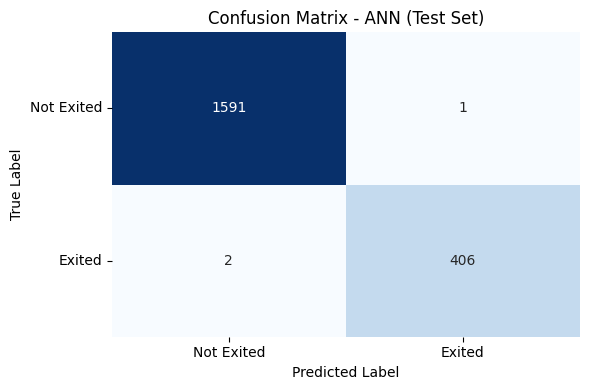

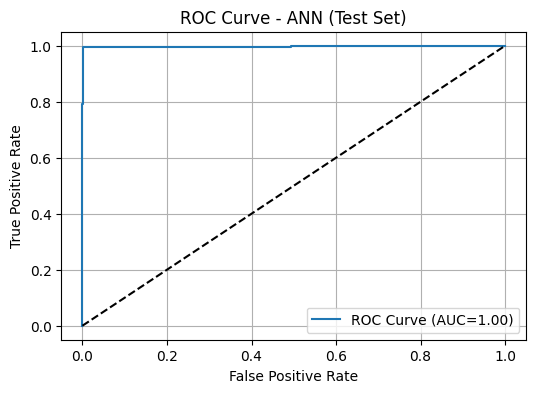

In [16]:
# Extract best hyperparameters
params = study.best_params

class BestANN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, params['hidden1'])
        self.fc2 = nn.Linear(params['hidden1'], params['hidden2'])
        self.fc3 = nn.Linear(params['hidden2'], 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=params['dropout1'])
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=params['dropout2'])
        return torch.sigmoid(self.fc3(x))

# Apply SMOTE on entire training set
X_sm, y_sm = SMOTE(random_state=42).fit_resample(X_train, y_train)
train_ds = TensorDataset(
    # Convert DataFrame X_sm to NumPy array using .values
    torch.tensor(X_sm.values, dtype=torch.float32),
    # y_sm is likely already a NumPy array from SMOTE, but .values is safe
    torch.tensor(y_sm.values.reshape(-1, 1), dtype=torch.float32)
)
train_loader = DataLoader(train_ds, batch_size=params['batch_size'], shuffle=True)

# Train final model
final_model = BestANN(X_train.shape[1]).to(device)
optimizer = torch.optim.Adam(final_model.parameters(), lr=params['lr'])
criterion = nn.BCELoss()

for epoch in range(30):
    final_model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = final_model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

# Test evaluation
final_model.eval()
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
with torch.no_grad():
    y_test_preds = final_model(X_test_tensor).cpu().numpy().flatten()
    y_test_bin = (y_test_preds >= 0.5).astype(int)

# Metrics
print("\n📊 Classification Report (Test):\n", classification_report(y_test, y_test_bin))
print("🔁 Confusion Matrix:\n", confusion_matrix(y_test, y_test_bin))
print("🎯 Test ROC AUC:", roc_auc_score(y_test, y_test_preds))

# Display confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_bin), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - ANN (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Exited', 'Exited'])
plt.yticks([0.5, 1.5], ['Not Exited', 'Exited'], rotation=0)
plt.tight_layout()
plt.show()

# ROC Curve
# Import roc_curve from sklearn.metrics
from sklearn.metrics import roc_curve
plt.figure(figsize=(6,4))
fpr, tpr, _ = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_test_preds):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Save model
model_path = "ann_final_model.pth"
torch.save(final_model.state_dict(), model_path)
print(f"✅ Model saved to {model_path}")




✅ Model saved to ann_final_model.pth


In [18]:
import xgboost as xgb
def objective_xgb(trial):
    # Suggested hyperparameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'use_label_encoder': False,
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    aucs = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # SMOTE only on training fold
        sm = SMOTE(random_state=42)
        X_tr_res, y_tr_res = sm.fit_resample(X_tr, y_tr)

        model = xgb.XGBClassifier(**params, random_state=42, verbosity=0)
        model.fit(X_tr_res, y_tr_res)

        y_val_preds = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_preds)
        aucs.append(auc)

    return np.mean(aucs)

# Run Optuna study
xgb_study = optuna.create_study(direction="maximize")
xgb_study.optimize(objective_xgb, n_trials=5)
print("✅ Best Hyperparameters:", xgb_study.best_params)

[I 2025-06-11 11:42:04,759] A new study created in memory with name: no-name-0f556e35-9b1d-454a-ad3d-87893a16fd68
[I 2025-06-11 11:42:05,205] Trial 0 finished with value: 0.999408899466765 and parameters: {'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.10303254503195158, 'subsample': 0.8940048056966087, 'colsample_bytree': 0.9108726210370706, 'gamma': 4.647195505794355, 'lambda': 9.14065781201862, 'alpha': 3.20278376390266, 'n_estimators': 133}. Best is trial 0 with value: 0.999408899466765.
[I 2025-06-11 11:49:11,358] Trial 1 finished with value: 0.9993172849738573 and parameters: {'booster': 'dart', 'max_depth': 6, 'learning_rate': 0.2815578087445476, 'subsample': 0.6859373141223992, 'colsample_bytree': 0.7950664060722004, 'gamma': 4.042055589813872, 'lambda': 5.091324363080024, 'alpha': 4.91832527212487, 'n_estimators': 341}. Best is trial 0 with value: 0.999408899466765.
[I 2025-06-11 12:01:13,147] Trial 2 finished with value: 0.9994324319227553 and parameters: {'booster':

✅ Best Hyperparameters: {'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.051950295387311766, 'subsample': 0.6697015290544666, 'colsample_bytree': 0.5450824526029857, 'gamma': 3.2119525889458407, 'lambda': 2.5246807606833865, 'alpha': 3.663374636609045, 'n_estimators': 108}


✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

✅ Confusion Matrix:
 [[1591    1]
 [   2  406]]
✅ Test AUC: 0.9995427505172924


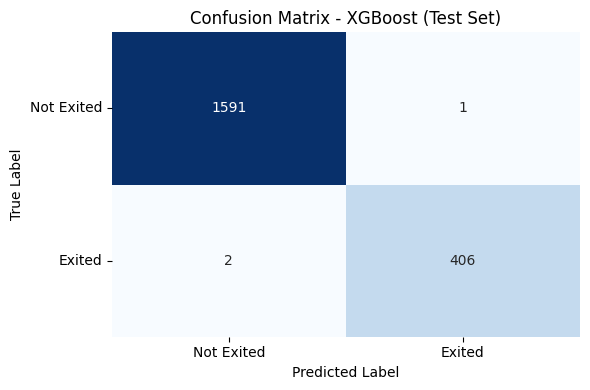

In [19]:
# Best hyperparameters from Optuna
best_params = xgb_study.best_params
best_params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'use_label_encoder': False,
    'random_state': 42,
    'verbosity': 0
})

# Apply SMOTE to the full training set
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train final model
final_xgb = xgb.XGBClassifier(**best_params)
final_xgb.fit(X_resampled, y_resampled)

# Predict on test set
y_pred = final_xgb.predict(X_test)
y_proba = final_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Test AUC:", roc_auc_score(y_test, y_proba))

# Display confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Exited', 'Exited'])
plt.yticks([0.5, 1.5], ['Not Exited', 'Exited'], rotation=0)
plt.tight_layout()
plt.show()

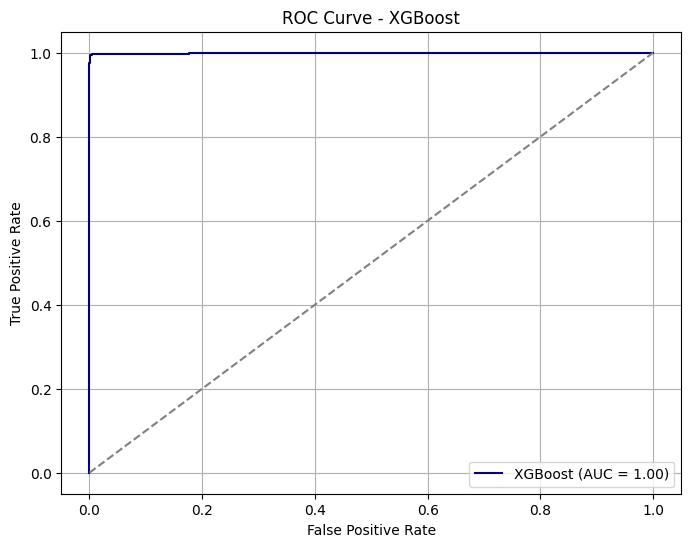

In [20]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})", color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Save the XGBoost model
model_path_xgb = "xgb_final_model.json" # Use .json extension for JSON format
final_xgb.save_model(model_path_xgb)
print(f"✅ XGBoost model saved to {model_path_xgb}")

✅ XGBoost model saved to xgb_final_model.json


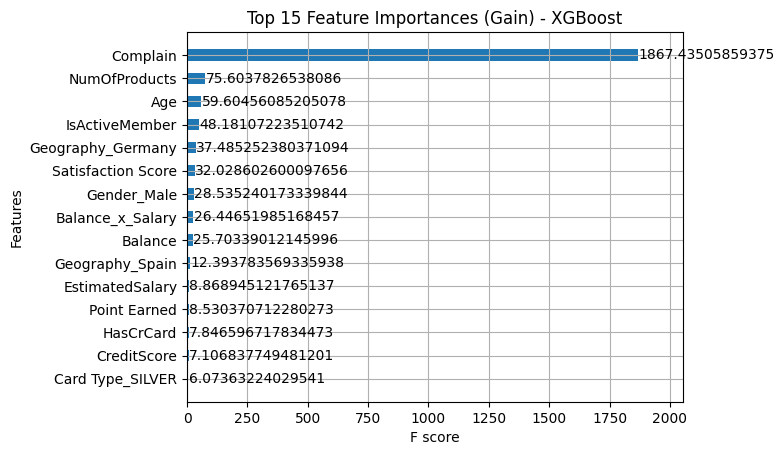

In [22]:
# Plot feature importance
xgb.plot_importance(final_xgb, importance_type='gain', max_num_features=15, height=0.5, grid=True)
plt.title("Top 15 Feature Importances (Gain) - XGBoost")
plt.show()

In [23]:
# Convert to NumPy arrays
X_tab = X.values # Changed from X_scaled.values to X.values
y_tab = y.values

# Split again to match X_train, X_test
X_tab_train, X_tab_test, y_tab_train, y_tab_test = train_test_split(X_tab, y_tab, test_size=0.2, stratify=y_tab, random_state=42)

# SMOTE on full training set
sm = SMOTE(random_state=42)
X_tab_train_res, y_tab_train_res = sm.fit_resample(X_tab_train, y_tab_train)


In [24]:
def objective_tabnet(trial):
    # Suggested hyperparameters
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 3, 10),
        'gamma': trial.suggest_float('gamma', 1.0, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 5),
        'n_shared': trial.suggest_int('n_shared', 1, 5),
        'optimizer_fn': torch.optim.Adam,
        'optimizer_params': {'lr': trial.suggest_float('lr', 1e-4, 1e-2, log=True)},
        'mask_type': trial.suggest_categorical('mask_type', ['sparsemax', 'entmax']),
        'scheduler_fn': torch.optim.lr_scheduler.StepLR,
        'scheduler_params': {"step_size": trial.suggest_int('step_size', 5, 20), "gamma": trial.suggest_float('scheduler_gamma', 0.5, 0.95)},
        'verbose': 0,
        'seed': 42
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Reduced folds for faster tuning
    aucs = []
    max_epochs_trial =5 # Reduced epochs for faster tuning

    for train_idx, val_idx in skf.split(X_tab_train, y_tab_train):
        X_tr, X_val = X_tab_train[train_idx], X_tab_train[val_idx]
        y_tr, y_val = y_tab_train[train_idx], y_tab_train[val_idx]

        # SMOTE on training fold only
        sm = SMOTE(random_state=42)
        X_tr_res, y_tr_res = sm.fit_resample(X_tr, y_tr)

        # Define TabNet model with trial parameters
        tabnet = TabNetClassifier(**params)

        # Train
        tabnet.fit(
            X_tr_res, y_tr_res,
            eval_set=[(X_val, y_val)],
            eval_name=['val'],
            eval_metric=['auc'],
            max_epochs=max_epochs_trial,
            patience=20, # Reduced patience for faster tuning
            batch_size=trial.suggest_categorical('batch_size', [512, 1024, 2048]),
            virtual_batch_size=trial.suggest_categorical('virtual_batch_size', [64, 128, 256])
        )

        # Predict and evaluate
        y_val_preds = tabnet.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_preds)
        aucs.append(auc)

    return np.mean(aucs)

# Run Optuna study
tabnet_study = optuna.create_study(direction="maximize")
tabnet_study.optimize(objective_tabnet, n_trials=5) # Reduced trials for example

print("✅ Best Hyperparameters for TabNet:", tabnet_study.best_params)

# Best hyperparameters from Optuna
best_params_tabnet = tabnet_study.best_params

# Include the fixed parameters
best_params_tabnet.update({
    'optimizer_fn': torch.optim.Adam,
    'mask_type': best_params_tabnet['mask_type'], # Use the one found by Optuna
    'scheduler_fn': torch.optim.lr_scheduler.StepLR,
    'verbose': 0,
    'seed': 42
})

# Need to handle optimizer_params and scheduler_params separately
best_params_tabnet['optimizer_params'] = {'lr': best_params_tabnet.pop('lr')}
best_params_tabnet['scheduler_params'] = {"step_size": best_params_tabnet.pop('step_size'), "gamma": best_params_tabnet.pop('scheduler_gamma')}

# Extract batch_size and virtual_batch_size for the fit method
batch_size_final = best_params_tabnet.pop('batch_size')
virtual_batch_size_final = best_params_tabnet.pop('virtual_batch_size')


# Apply SMOTE to the full training set
sm = SMOTE(random_state=42)
X_tab_train_res, y_tab_train_res = sm.fit_resample(X_tab_train, y_tab_train)

# Train final TabNet model with best hyperparameters
# Pass best_params_tabnet which now excludes batch_size and virtual_batch_size
final_tabnet = TabNetClassifier(**best_params_tabnet)

# Train with more epochs for the final model
# Pass batch_size and virtual_batch_size directly to the fit method
final_tabnet.fit(
    X_tab_train_res, y_tab_train_res,
    eval_set=[(X_tab_test, y_tab_test)], # Evaluate on test set during final training
    eval_name=['test'],
    eval_metric=['auc'],
    max_epochs=5, # Increased epochs for final model (was 5)
    patience=30,
    batch_size=batch_size_final, # Use the one found by Optuna
    virtual_batch_size=virtual_batch_size_final # Use the one found by Optuna
)

[I 2025-06-11 12:05:20,993] A new study created in memory with name: no-name-3e41e792-e9bf-4ce1-a0ec-38e888b7b539


Stop training because you reached max_epochs = 5 with best_epoch = 3 and best_val_auc = 0.9312


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.85731


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.89541


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-06-11 12:05:45,814] Trial 0 finished with value: 0.8946411083841772 and parameters: {'n_d': 46, 'n_a': 33, 'n_steps': 10, 'gamma': 1.8859451473467406, 'n_independent': 5, 'n_shared': 1, 'lr': 0.006738863890903808, 'mask_type': 'entmax', 'step_size': 7, 'scheduler_gamma': 0.660968701468235, 'batch_size': 2048, 'virtual_batch_size': 128}. Best is trial 0 with value: 0.8946411083841772.


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.87232


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.8642


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.84752


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-06-11 12:06:18,289] Trial 1 finished with value: 0.8613465924791784 and parameters: {'n_d': 40, 'n_a': 35, 'n_steps': 8, 'gamma': 1.136175988638188, 'n_independent': 5, 'n_shared': 1, 'lr': 0.0011514924584161736, 'mask_type': 'sparsemax', 'step_size': 16, 'scheduler_gamma': 0.7588123530201363, 'batch_size': 1024, 'virtual_batch_size': 64}. Best is trial 0 with value: 0.8946411083841772.


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.94466


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.95203


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 3 and best_val_auc = 0.96196


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-06-11 12:06:42,366] Trial 2 finished with value: 0.9528816305824384 and parameters: {'n_d': 62, 'n_a': 28, 'n_steps': 10, 'gamma': 1.8532562794801577, 'n_independent': 4, 'n_shared': 1, 'lr': 0.0028738503145703366, 'mask_type': 'sparsemax', 'step_size': 18, 'scheduler_gamma': 0.6435649980764557, 'batch_size': 1024, 'virtual_batch_size': 128}. Best is trial 2 with value: 0.9528816305824384.


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.79203


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.8205


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.78987


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-06-11 12:07:09,876] Trial 3 finished with value: 0.800797461048302 and parameters: {'n_d': 32, 'n_a': 26, 'n_steps': 8, 'gamma': 1.2461616047440458, 'n_independent': 2, 'n_shared': 3, 'lr': 0.0008342064530449633, 'mask_type': 'sparsemax', 'step_size': 19, 'scheduler_gamma': 0.918156857005396, 'batch_size': 1024, 'virtual_batch_size': 64}. Best is trial 2 with value: 0.9528816305824384.


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.99674


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.99374


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_auc = 0.99738


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-06-11 12:07:26,099] Trial 4 finished with value: 0.995955909013062 and parameters: {'n_d': 33, 'n_a': 10, 'n_steps': 9, 'gamma': 1.2463845542880745, 'n_independent': 4, 'n_shared': 1, 'lr': 0.007336761332841053, 'mask_type': 'sparsemax', 'step_size': 12, 'scheduler_gamma': 0.6470778393054413, 'batch_size': 1024, 'virtual_batch_size': 256}. Best is trial 4 with value: 0.995955909013062.


✅ Best Hyperparameters for TabNet: {'n_d': 33, 'n_a': 10, 'n_steps': 9, 'gamma': 1.2463845542880745, 'n_independent': 4, 'n_shared': 1, 'lr': 0.007336761332841053, 'mask_type': 'sparsemax', 'step_size': 12, 'scheduler_gamma': 0.6470778393054413, 'batch_size': 1024, 'virtual_batch_size': 256}
Stop training because you reached max_epochs = 5 with best_epoch = 3 and best_test_auc = 0.99635


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1592
           1       0.97      0.99      0.98       408

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

✅ Confusion Matrix:
 [[1580   12]
 [   5  403]]
✅ Test AUC: 0.9963543206227216


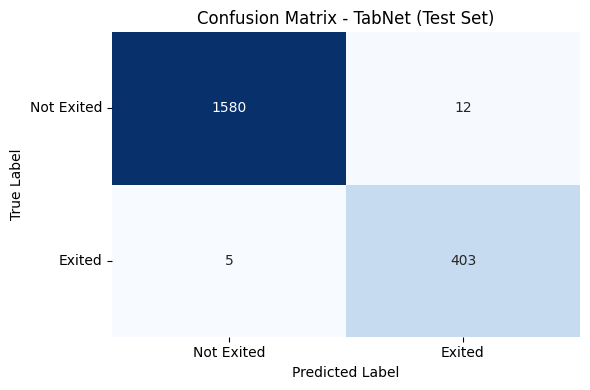

In [25]:
# Predict on test set
y_test_preds = final_tabnet.predict(X_tab_test) # Changed tabnet to final_tabnet
y_test_proba = final_tabnet.predict_proba(X_tab_test)[:, 1] # Changed tabnet to final_tabnet

# Evaluation metrics
print("✅ Classification Report:\n", classification_report(y_tab_test, y_test_preds))
print("✅ Confusion Matrix:\n", confusion_matrix(y_tab_test, y_test_preds))
print("✅ Test AUC:", roc_auc_score(y_tab_test, y_test_proba))

# Display confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_tab_test, y_test_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - TabNet (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Not Exited', 'Exited'])
plt.yticks([0.5, 1.5], ['Not Exited', 'Exited'], rotation=0)
plt.tight_layout()
plt.show()

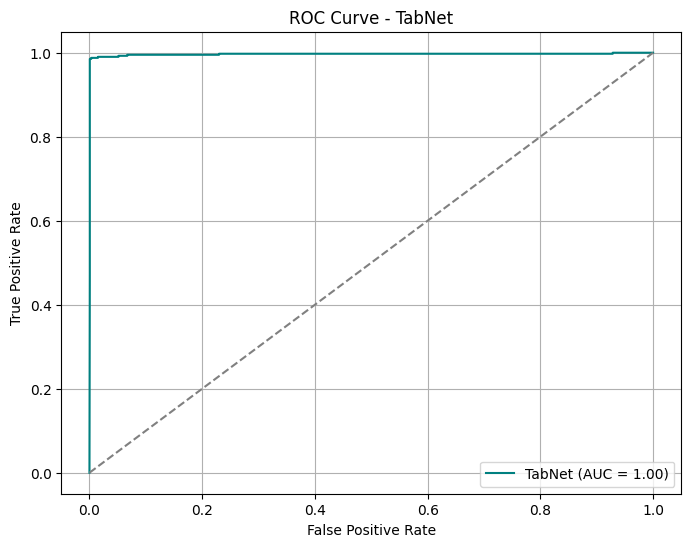

In [26]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_tab_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='teal', label=f"TabNet (AUC = {roc_auc_score(y_tab_test, y_test_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TabNet")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-27-2434678899>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


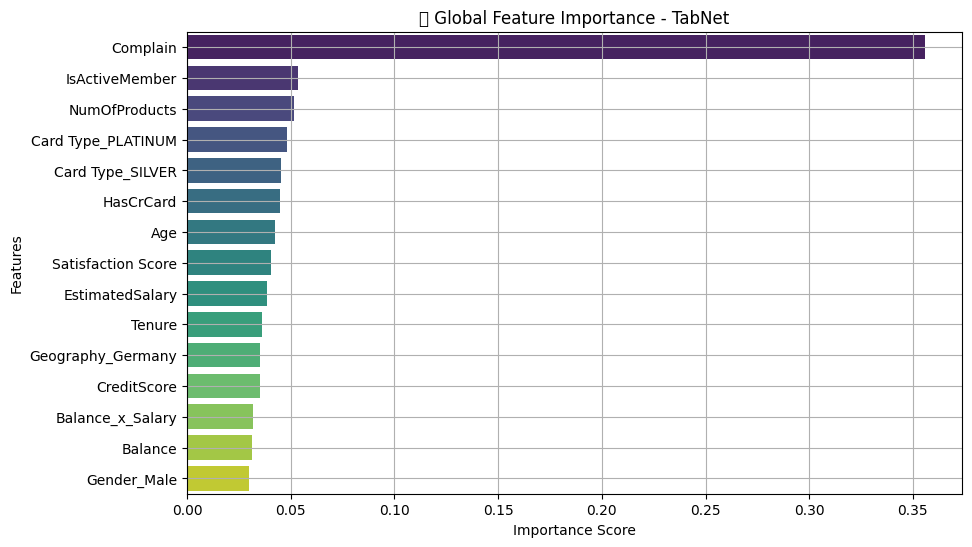

In [27]:
# TabNet global feature importance
# Changed 'tabnet' to 'final_tabnet'
feature_importances = final_tabnet.feature_importances_

# Plot top N features
top_n = 15
top_features_idx = np.argsort(feature_importances)[::-1][:top_n]
# X is a DataFrame used earlier, its columns represent the feature names
top_features = X.columns[top_features_idx]
top_scores = feature_importances[top_features_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features, palette="viridis")
plt.title("🌍 Global Feature Importance - TabNet")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Derive feature names if not already defined
if 'feature_names' not in globals() or not feature_names:
    if 'X' in globals() and isinstance(X, pd.DataFrame):
        feature_names = X.columns.tolist()
        print("✅ Derived feature_names from X DataFrame.")
    elif 'X_selected' in globals() and isinstance(X_selected, pd.DataFrame):
        feature_names = X_selected.columns.tolist()
        print("✅ Derived feature_names from X_selected DataFrame.")
    else:
        print("⚠️ Warning: Could not derive feature_names. Using fallback.")
        feature_names = [f'feature_{i}' for i in range(X_tab_test.shape[1])]


def plot_tabnet_interpretability(sample_idx, X_data, y_true_data, model, feature_names):
    print(f"\n🧪 Analyzing sample index: {sample_idx}")

    X_single = X_data[sample_idx:sample_idx+1]
    y_true = y_true_data[sample_idx]

    # Prediction
    prob = model.predict_proba(X_single)[0, 1]
    pred = int(prob >= 0.5)
    print(f"🟢 Predicted Probability: {prob:.4f} | Predicted Class: {pred} | True Label: {y_true}")

    try:
        # Try to unpack 3 values from explain
        try:
            M_explain, masks, masks_dict = model.explain(X_single)
        except ValueError:
            M_explain, masks_dict = model.explain(X_single)
            masks = None

        # Aggregated attention
        M_single = None
        if isinstance(masks_dict, dict):
            if 0 in masks_dict:
                M_single = masks_dict[0]
            elif 'M_explain' in masks_dict:
                M_single = masks_dict['M_explain']

            if isinstance(M_single, np.ndarray) and M_single.ndim == 2 and M_single.shape[0] == 1:
                M_single = M_single[0]
            else:
                M_single = None
        elif isinstance(masks_dict, np.ndarray) and masks_dict.ndim == 2:
            M_single = masks_dict[0]

        # Step-by-step attention
        if masks is None and isinstance(masks_dict, dict):
            masks_list = []
            steps = model.n_steps if hasattr(model, 'n_steps') else len(masks_dict)
            if all(isinstance(k, int) for k in masks_dict.keys()):
                for step in range(steps):
                    step_mask = masks_dict.get(step)
                    if step_mask is not None:
                        if step_mask.ndim == 2:
                            masks_list.append(step_mask[0])
                        elif step_mask.ndim == 1:
                            masks_list.append(step_mask)
                if len(masks_list) == steps:
                    masks = np.vstack(masks_list)

        # --- Plot Step-by-Step Attention ---
        if masks is not None and masks.ndim == 2 and masks.shape[1] == len(feature_names):
            print("📊 Plotting step-by-step attention")
            plt.figure(figsize=(12, masks.shape[0] * 0.8))
            sns.heatmap(masks, yticklabels=[f"Step {i+1}" for i in range(masks.shape[0])],
                        xticklabels=feature_names, cmap="YlGnBu", linewidths=0.5)
            plt.title(f"🚶 Step-by-Step Attention (True: {y_true}, Pred: {pred})")
            plt.xlabel("Features")
            plt.ylabel("Steps")
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ Step-by-step attention not available")

        # --- Plot Aggregated Attention ---
        if M_single is not None and M_single.shape[0] == len(feature_names):
            print("📊 Plotting aggregated attention")
            sorted_idx = np.argsort(M_single)[::-1]
            sorted_features = [feature_names[i] for i in sorted_idx]
            sorted_values = M_single[sorted_idx]

            plt.figure(figsize=(12, 6))
            sns.barplot(x=sorted_values, y=sorted_features, palette="viridis")
            plt.title(f"🔍 Aggregated Attention (True: {y_true}, Pred: {pred})")
            plt.xlabel("Importance Score")
            plt.ylabel("Feature")
            plt.grid(True, axis='x')
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ Aggregated attention not available")

    except Exception as e:
        print(f"❌ Error during explain: {e}")


✅ Derived feature_names from X DataFrame.



🧪 Analyzing sample index: 0
🟢 Predicted Probability: 0.0144 | Predicted Class: 0 | True Label: 0
📊 Plotting step-by-step attention


<ipython-input-28-2945863780>:78: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


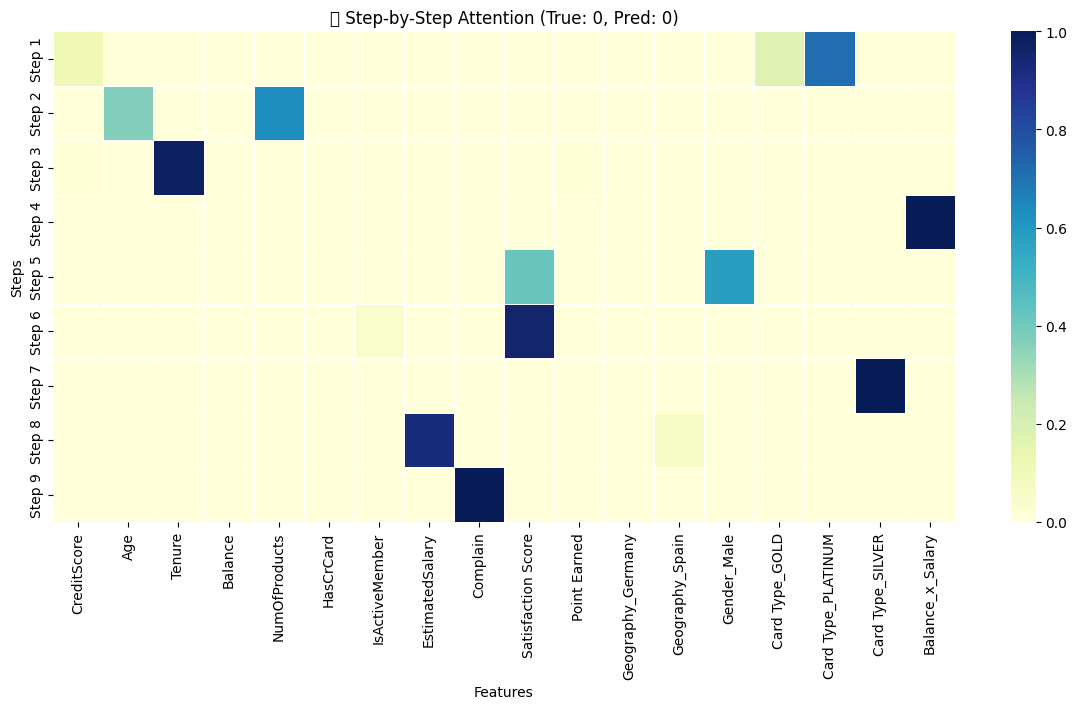

<ipython-input-28-2945863780>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_values, y=sorted_features, palette="viridis")


📊 Plotting aggregated attention


<ipython-input-28-2945863780>:96: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


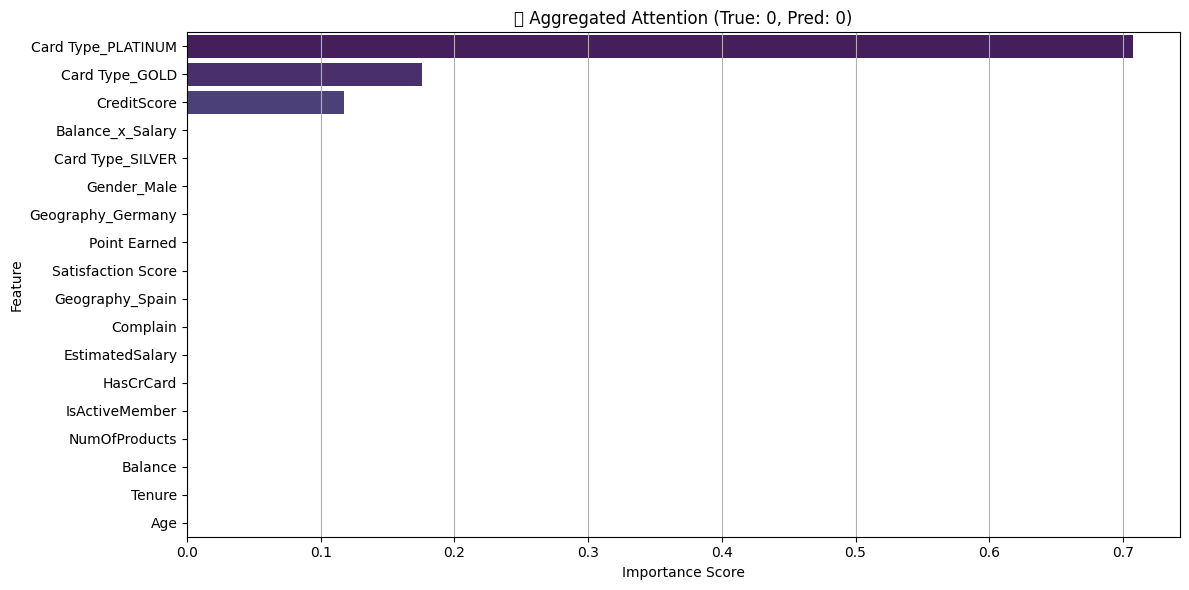


🧪 Analyzing sample index: 3
🟢 Predicted Probability: 1.0000 | Predicted Class: 1 | True Label: 1
📊 Plotting step-by-step attention


<ipython-input-28-2945863780>:78: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


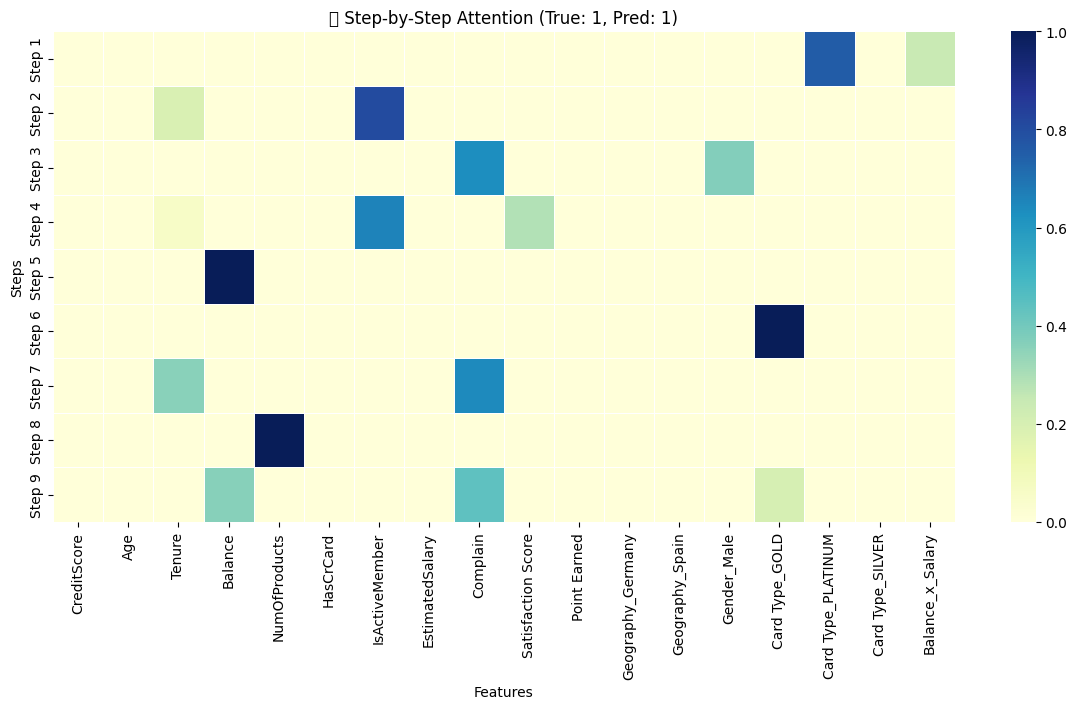

<ipython-input-28-2945863780>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_values, y=sorted_features, palette="viridis")


📊 Plotting aggregated attention


<ipython-input-28-2945863780>:96: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


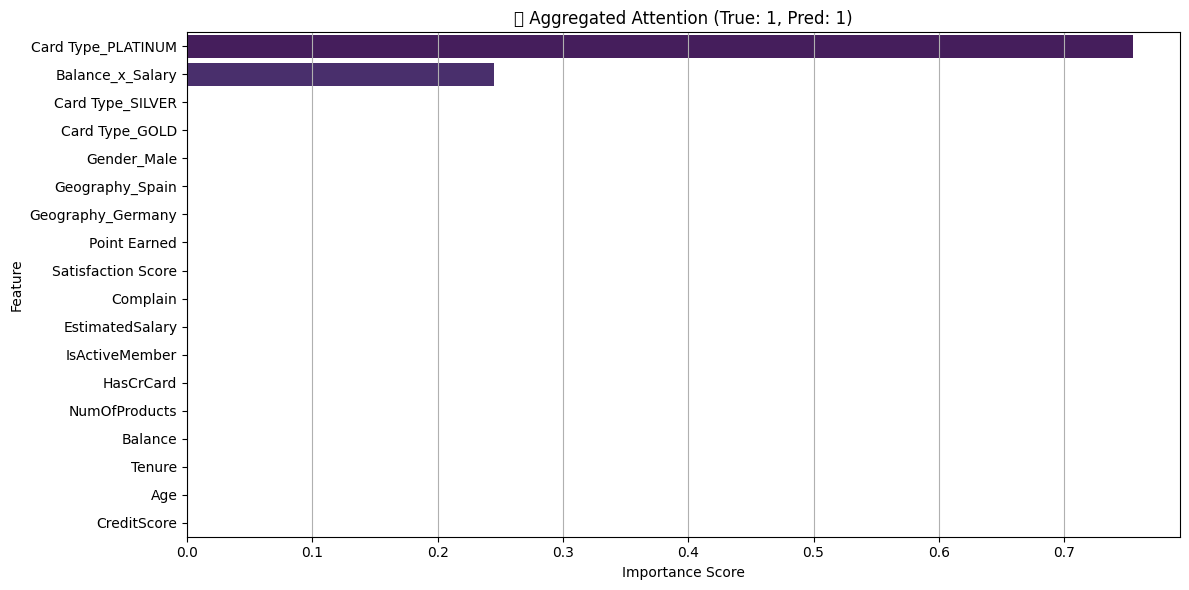


🧪 Analyzing sample index: 40
🟢 Predicted Probability: 0.6098 | Predicted Class: 1 | True Label: 0
📊 Plotting step-by-step attention


<ipython-input-28-2945863780>:78: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


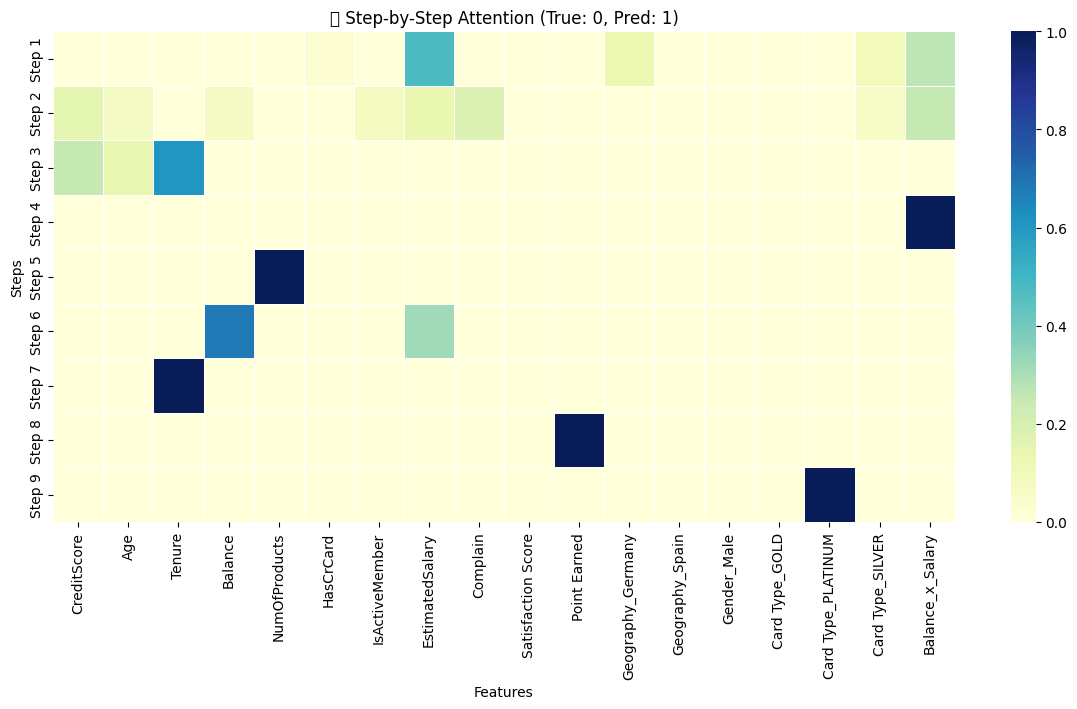

📊 Plotting aggregated attention


<ipython-input-28-2945863780>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_values, y=sorted_features, palette="viridis")
<ipython-input-28-2945863780>:96: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


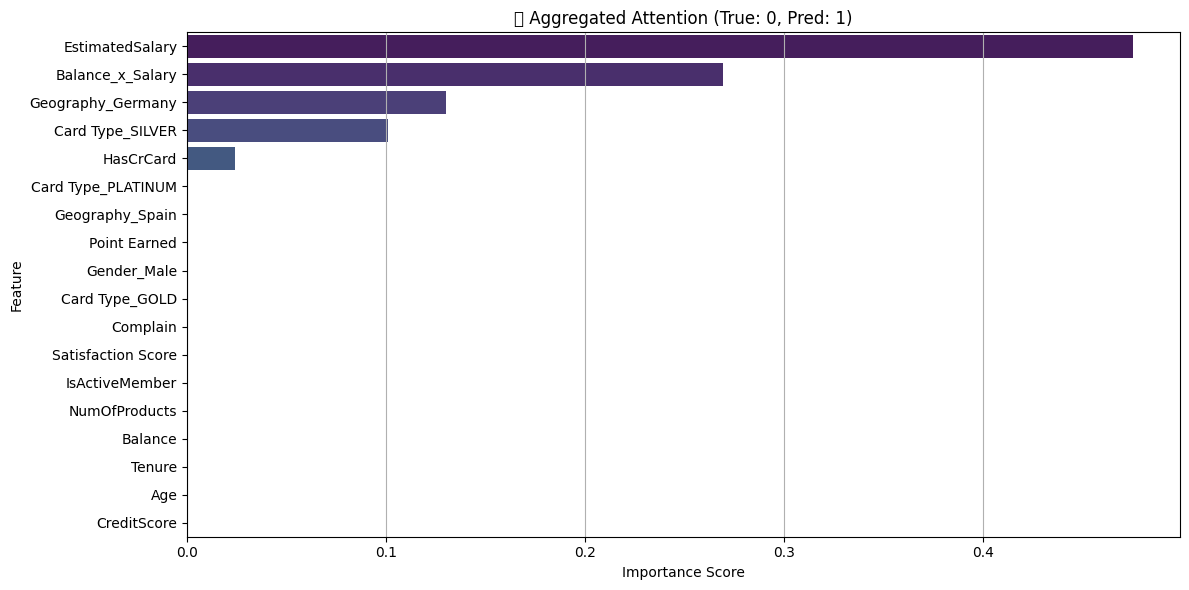


🧪 Analyzing sample index: 664
🟢 Predicted Probability: 0.0410 | Predicted Class: 0 | True Label: 1
📊 Plotting step-by-step attention


<ipython-input-28-2945863780>:78: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


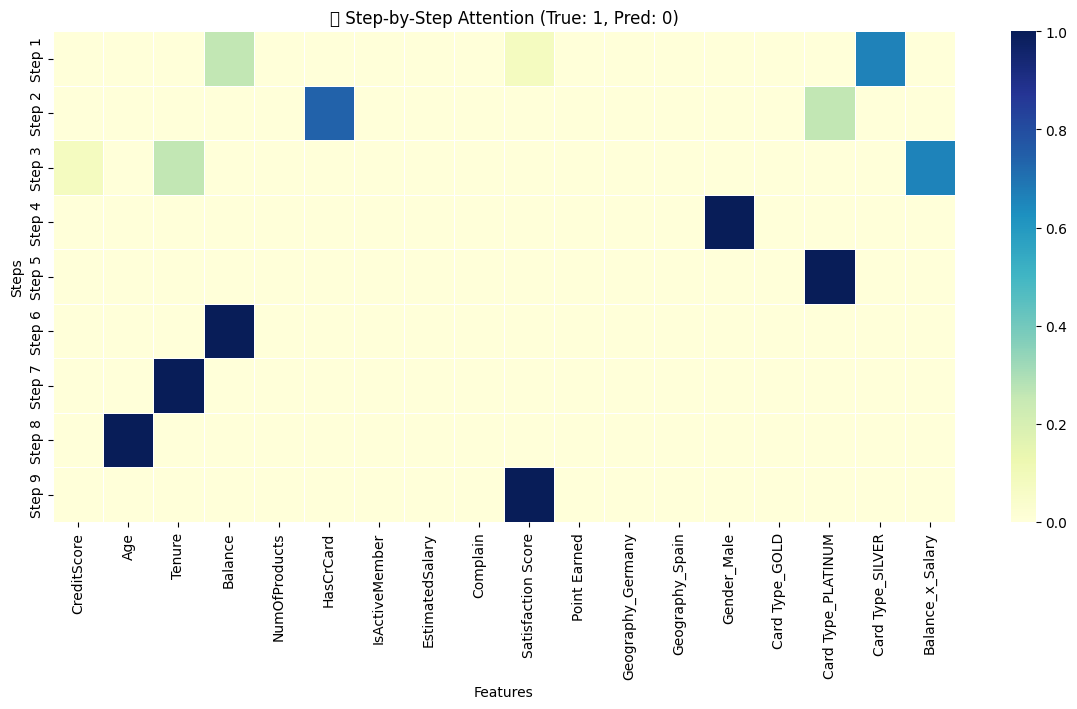

<ipython-input-28-2945863780>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_values, y=sorted_features, palette="viridis")


📊 Plotting aggregated attention


<ipython-input-28-2945863780>:96: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


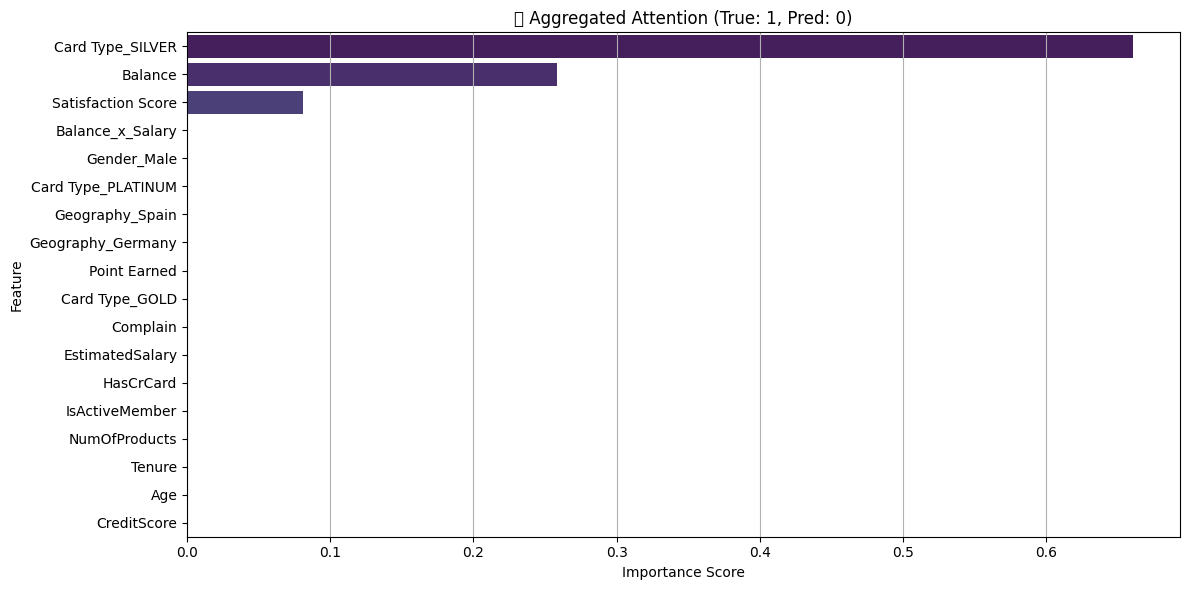

In [29]:
# Get predictions
y_pred_tabnet = (final_tabnet.predict_proba(X_tab_test)[:, 1] >= 0.5).astype(int)

# Indices for different categories
correct_0 = [i for i, (t, p) in enumerate(zip(y_tab_test, y_pred_tabnet)) if t == 0 and p == 0]
correct_1 = [i for i, (t, p) in enumerate(zip(y_tab_test, y_pred_tabnet)) if t == 1 and p == 1]
fp = [i for i, (t, p) in enumerate(zip(y_tab_test, y_pred_tabnet)) if t == 0 and p == 1]
fn = [i for i, (t, p) in enumerate(zip(y_tab_test, y_pred_tabnet)) if t == 1 and p == 0]

# Visualize
if correct_0: plot_tabnet_interpretability(correct_0[0], X_tab_test, y_tab_test, final_tabnet, feature_names)
if correct_1: plot_tabnet_interpretability(correct_1[0], X_tab_test, y_tab_test, final_tabnet, feature_names)
if fp:        plot_tabnet_interpretability(fp[0], X_tab_test, y_tab_test, final_tabnet, feature_names)
if fn:        plot_tabnet_interpretability(fn[0], X_tab_test, y_tab_test, final_tabnet, feature_names)


In [31]:
# ✅ Final model trained
final_tabnet.fit(X_tab_train, y_tab_train)

# ✅ Save it for Streamlit deployment
import joblib
import os # Import the os module

# Define the directory path
model_dir = 'models'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"✅ Created directory: {model_dir}")

# Define the full path to the model file
model_path = os.path.join(model_dir, 'final_tabnet_model.pkl')

# Save the model
joblib.dump(final_tabnet, model_path)

print(f"✅ Model saved to {model_path}")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


✅ Created directory: models
✅ Model saved to models/final_tabnet_model.pkl


In [33]:
import os

# Define the directory path
data_dir = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"✅ Created directory: {data_dir}")

# Save the data to the specified path
np.savez(os.path.join(data_dir, "test_data.npz"), X=X_tab_test, y=y_tab_test)

print("✅ Test data saved to data/test_data.npz")


✅ Created directory: data
✅ Test data saved to data/test_data.npz


In [34]:


# If X_tab_test is a NumPy array, use the original column names from your processed DataFrame
pd.DataFrame(X_tab_test, columns=feature_names).head(1)  # Confirm alignment
pd.DataFrame(columns=feature_names).to_csv("data/X_columns.csv", index=False)
